# King County Housing Prices Prediction

**DSF-PT7, Group 17:**
1. Agatha Nyambati
2. Mary Musyoka
3. Phoebe Wawire
4. Shamla Araya
5. Zenah Biwott


### Introduction:

King County, located in the state of Washington, encompasses a diverse range of urban, suburban, and rural communities, including the city of Seattle. The housing market in King County has been characterized by rapid growth, high demand, and escalating prices over the past decade, influenced by factors such as population growth, economic prosperity, and limited housing supply.

The King County Housing Price Prediction Project is an initiative aimed at accurately forecasting housing prices in King County, Washington. This project leverages advanced data analytics and machine learning techniques to provide precise and actionable insights into the factors influencing housing prices in the region. By analyzing historical data and current market trends, we aim to develop a robust predictive model that can assist homebuyers, sellers, real estate agents, and policymakers in making informed decisions.

***

# Objectives:

1. Determine the key influencing factors for the housing prices in the region.
2. Provide a valuable EDA (Exploratory Data Analysis) for stakeholders such as homebuyers, sellers, real estate professionals, and policymakers to make data-driven decisions regarding property transactions and urban planning.
3. Develop a machine learning model capable of predicting housing prices with high accuracy based on a variety of factors including property features, location, and market conditions.

***

## Data Understanding

The data set we are using for this project is from Kaggel website. This dataset contains more than 21,000 rows and 21 columns which describe or quantify the different aspects of the housing situation in the region. These features are crucial for achieving the objectives stated above.
We will load the data and check if there are any missing or null values that could impair our analysis. To do this properly we will follow the following steps:

1. Load the dataset.
2. Data cleaning where we will check for missing values and any limitations within the dataset and prepare the dataset.
3. Data exploration where we will clearly identify all the features and select the ones we are willing to work with.
4. Analysis of the data to come up with insights that we can learn about the housing situation in the region
5. Preparing the data for machine learning models to predict the housing prices given different variables.

***

## 1. Loading the Data

In [2]:
# Start by importing all the necessary libraries fot our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [3]:
# Load the actual data

df = pd.read_csv('/Users/madservices/Documents/FlatIron/dsc-data-science-env-config/Phase_2/Phase-2-Group-17-Project/data/kc_house_data.csv')

# Check the firs 5 rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [4]:
# Statistical summary of the dataset
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Here we see that housing price ranges from $78,000.00 to $7,700000.00 with an average being around $540,000.00

In [5]:
# General information about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the above codes we learn that the dataset contains 21597 rows (entries) and 21 columns. The data type of the columns include integers, strings, and float numbers.

***

## 2. Data Cleaning

In [6]:
# Check for missing values in the dataset
df.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

As can be seen we have missing values from the "waterfront", "view" and "yr_renovated" columns. We need to check and handle them before we can proceed to EDA.

In [7]:
# Let us start with the waterfront column and see what the unique values are
df['waterfront'].unique()

array([nan,  0.,  1.])

The above code shows that the values for the waterfront column are 0 and 1 which means if a house has a waterfront its value is 1 otherwise it is 0. With this understanding we will fill the nan values with 0s.

In [8]:
# Filling the nan values with 0
df['waterfront'].fillna(0, inplace=True)

# Changing the datatype to integer from float
df['waterfront'] = df['waterfront'].astype('int')

# Checking the changes we made
df['waterfront'].unique()

# Now the waterfront column has no missing values and all the values are either 0 or 1.

/var/folders/m7/31mld3hn46s_y1f05nhxt1_c0000gn/T/ipykernel_27693/1740310483.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['waterfront'].fillna(0, inplace=True)


array([0, 1])

In [9]:
# Let us do the same chaeck with the view column
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

According to the column description above the view column shows how many times a house has been viewed before. Based on this the nan values can be anything between 0 and 4 which is the highest value in the column. Therefore it is possible to fill the nan values with with the median value.

In [10]:
# Calculating the median value of the view column
median_value_view = df['view'].median()

# Replacing the nan value with the median value
df['view'].fillna(median_value_view, inplace=True)

# Checking the changes we made
df['view'].unique()

/var/folders/m7/31mld3hn46s_y1f05nhxt1_c0000gn/T/ipykernel_27693/1904015202.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['view'].fillna(median_value_view, inplace=True)


array([0., 3., 4., 2., 1.])

In [11]:
# Checking the sqft_basement column
df['sqft_basement'].value_counts()


sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

This column gives the total basement size in sqft. It is a common knowledge that not all the houses have basement. The ones that have no basement are assigned a value 0. The "?" indicates that it is not certain whether the house has basement or not so we will treat it as if it doesn't have. This column contains a non-numeric value and has a string data type. We need to fix this.

In [12]:
# Changing the sqft_basement data type to numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')


# Replacing the non_numeric value with the median value
df['sqft_basement'].fillna(0, inplace = True)

# Checking the changes on sqft_basement column
df['sqft_basement'].isnull().sum()

/var/folders/m7/31mld3hn46s_y1f05nhxt1_c0000gn/T/ipykernel_27693/382070186.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sqft_basement'].fillna(0, inplace = True)


0

From the data observation above we can see that one house has 33 bedrooms. This eventhough it can be, doesn't seem to be right and needs further investigation.

In [13]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

Let us pull all the data for this house and check

In [14]:
# Let's see closely at the 33 bedrooms entry and investigate
df[df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [15]:
# Let's see closely at the 10 bedrooms entry and compare
df[df["bedrooms"]==10].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.000000e+00,3.000000e+00,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000
mean,5.001934e+09,8.200000e+05,10.0,3.416667,3706.666667,8859.666667,1.666667,0.0,0.666667,3.666667,7.666667,2456.666667,1250.000000,1959.666667,0.0,98038.333333,47.606700,-122.202667,2193.333333,8686.333333
std,4.121612e+09,2.858321e+05,0.0,1.664582,839.186114,4457.226754,0.577350,0.0,1.154701,0.577350,1.154701,576.223336,762.954782,47.521925,0.0,57.743687,0.049805,0.106237,478.783180,4345.760041
min,6.273001e+08,6.500000e+05,10.0,2.000000,2920.000000,3745.000000,1.000000,0.0,0.000000,3.000000,7.000000,1860.000000,600.000000,1913.000000,0.0,98004.000000,47.570500,-122.320000,1810.000000,3745.000000
25%,3.096700e+09,6.550000e+05,10.0,2.500000,3265.000000,7332.500000,1.500000,0.0,0.000000,3.500000,7.000000,2180.000000,830.000000,1935.500000,0.0,98005.000000,47.578300,-122.247500,1925.000000,7072.500000
50%,5.566100e+09,6.600000e+05,10.0,3.000000,3610.000000,10920.000000,2.000000,0.0,0.000000,4.000000,7.000000,2500.000000,1060.000000,1958.000000,0.0,98006.000000,47.586100,-122.175000,2040.000000,10400.000000
75%,7.189251e+09,9.050000e+05,10.0,4.125000,4100.000000,11417.000000,2.000000,0.0,1.000000,4.000000,8.000000,2755.000000,1575.000000,1983.000000,0.0,98055.500000,47.624800,-122.144000,2385.000000,11157.000000
max,8.812401e+09,1.150000e+06,10.0,5.250000,4590.000000,11914.000000,2.000000,0.0,2.000000,4.000000,9.000000,3010.000000,2090.000000,2008.000000,0.0,98105.000000,47.663500,-122.113000,2730.000000,11914.000000


Now if we check carefully the average price for a 10 bedroom house is $820,000.00 while the price for the 33 bedroom house is $640,000.00. This comparison and even the size of the sqft_living shows that this entry is wrong. So we will drop it off our dataset as it can skew our analysis late on.

In [16]:
# Dropping the entry for the house with 33 bedrooms using its id.
df.drop([15856], axis = 0, inplace=True)

# Checking the modification
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [17]:
# check the year renovated column to learn about the values and decide what to do with the missing ones.
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [18]:
# Since the yr_renovated column describes the year a house was renovated those that are not renovated are assigned a value 0. So we shall fill the nan value with 0.
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Checking the changes on yr_renovated column


In [19]:
# Let us recheck if our data has any missing or null values
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Good now our dataset has no missing or null values. The id, date and zipcode columns in our dataset are not important for this project so we should drop them.

In [20]:
# Dropping the id, date and zipcode columns from our dataset
df.drop(['id', 'date', 'zipcode'], axis = 1, inplace=True)

Let us Remove the outliers from our dataset

In [21]:
# Calculate IQR for selected columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]

In [22]:
# droping all columns with outliers 
clean_df = df.drop(outlier_indices)

Let us check for duplicates as well

In [23]:
# Check for duplicates
clean_df = clean_df.drop_duplicates(keep=False)

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14988 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          14988 non-null  float64
 1   bedrooms       14988 non-null  int64  
 2   bathrooms      14988 non-null  float64
 3   sqft_living    14988 non-null  int64  
 4   sqft_lot       14988 non-null  int64  
 5   floors         14988 non-null  float64
 6   waterfront     14988 non-null  int64  
 7   view           14988 non-null  float64
 8   condition      14988 non-null  int64  
 9   grade          14988 non-null  int64  
 10  sqft_above     14988 non-null  int64  
 11  sqft_basement  14988 non-null  float64
 12  yr_built       14988 non-null  int64  
 13  yr_renovated   14988 non-null  float64
 14  lat            14988 non-null  float64
 15  long           14988 non-null  float64
 16  sqft_living15  14988 non-null  int64  
 17  sqft_lot15     14988 non-null  int64  
dtypes: float64(

***

## 3: Data Exploration

Let us check the columns of our dataset and see which ones we can use for our objectives.

### Objective 1. Determine the key influencing factors for the housing prices in the region.
To do this let us examine how all the features in our dataset are related to the Price column

In [24]:
# Checking the correlation between all the features in our dataset and the house prices
correlation_matrix = df.corr()
correlation_matrix['price'].sort_values(ascending=False)


price            1.000000
sqft_living      0.701929
grade            0.667964
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
view             0.393502
sqft_basement    0.321103
bedrooms         0.315961
lat              0.306687
waterfront       0.264308
floors           0.256820
yr_renovated     0.117858
sqft_lot         0.089879
sqft_lot15       0.082849
yr_built         0.053965
condition        0.036031
long             0.022047
Name: price, dtype: float64

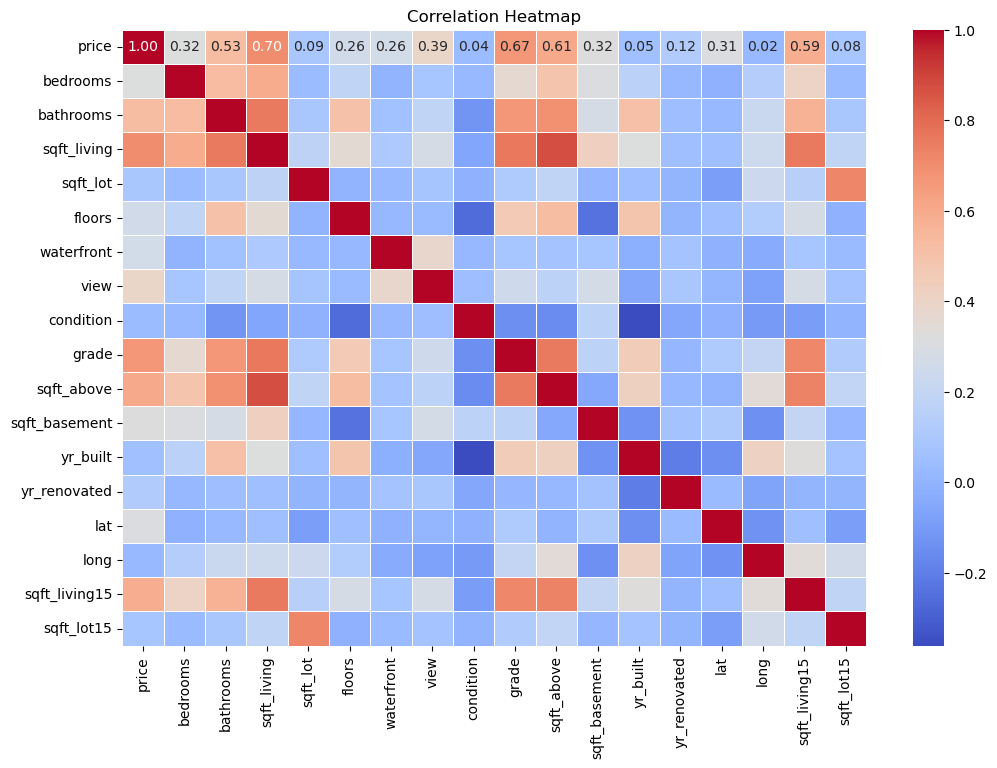

In [25]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

As can be seen above, sqft_living, grade, sqft_above, sqft_living15, bathrooms are the top 5 columns highly correlated with the house price. This strong positive correlation indicate that these features have great impact on the house price in King County. While view, sqft_basement, bedrooms, lat, waterfront, floors have moderate positive correlation. The rest of the features have low correlation which means their impact in determining the house price is low. Let us demonstrate this further using plots.

In [26]:
# let us create data frames with these category of features
highly_influencers = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]
moderate_influencers = df[['view','sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors']]
no_influencers = df[['yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'condition', 'long']]

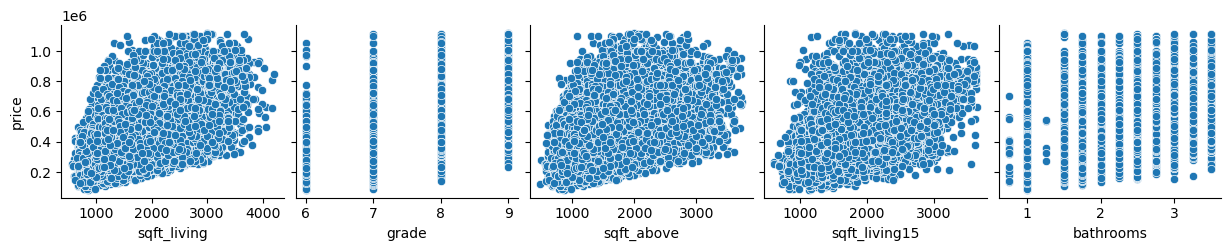

In [27]:
# Pair Plotting features with the house price
sns.pairplot(clean_df, y_vars=['price'], x_vars=highly_influencers.columns)
plt.show()


Based on the correlation analysis and considering the goal of predicting house prices (price) in King County, here are the most important features we should consider:

**Primary Features:**

**sqft_living:** Square footage of the living area (Correlation: 0.70).

**grade:** Overall grade given to the housing unit (Correlation: 0.67).

**sqft_above:** Square footage of the house above ground level (Correlation: 0.61).

**bathrooms:** Number of bathrooms in the house (Correlation: 0.53).


**Additional Features:**

**bedrooms:** Number of bedrooms in the house (Correlation: 0.31).

# Why These Features?

**Strong Correlation:** These features exhibit the highest correlations with price based on our analysis, indicating a strong linear relationship with house prices in King County.

**Market Relevance:** Features like sqft_living, grade, and bathrooms are fundamental factors influencing property values, reflecting buyer preferences and market dynamics in the region.

**Predictive Power:** Models incorporating these features are likely to yield more accurate predictions of house prices due to their significant impact on property valuations.

***

## 4: Data Analysis

Since price is our target variable, let us first investigate it.

In [28]:
clean_df.sort_values(['price'], ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
639,1120000.0,3,1.50,3000,5750,2.0,0,0.0,5,9,2000,1000.0,1924,0.0,47.5821,-122.390,1820,5750
11096,1110000.0,5,3.25,3070,5000,2.0,0,0.0,3,9,2050,1020.0,2006,0.0,47.6742,-122.356,2070,5000
7662,1110000.0,5,3.50,3090,3600,2.0,0,0.0,3,9,2060,1030.0,2000,0.0,47.6217,-122.309,2240,3904
20753,1110000.0,4,3.00,2770,2650,2.0,0,0.0,3,9,2180,590.0,2014,0.0,47.6435,-122.354,1820,2960
14995,1110000.0,4,1.50,2740,4000,2.0,0,0.0,5,9,1930,0.0,1905,0.0,47.6343,-122.352,1680,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18924,90000.0,3,1.00,980,2490,2.0,0,0.0,4,6,980,0.0,1969,0.0,47.3170,-122.182,980,3154
5860,89000.0,3,1.00,900,4750,1.0,0,0.0,4,6,900,0.0,1969,0.0,47.3026,-122.363,900,3404
13743,86500.0,3,1.00,840,9480,1.0,0,0.0,3,6,840,0.0,1960,0.0,47.3277,-122.341,840,9420
10242,85000.0,2,1.00,830,9000,1.0,0,0.0,3,6,830,0.0,1939,0.0,47.3813,-122.243,1160,7680


What we see from here is that the price ranges from $78k for 2 bedroom house with 780sqft living space, 1 floor, 1 bathroom to $7.7mil for a 6 bedroom, with 8 bathrooms, 2.5 floors and  12050sqft living space. This is a huge gap and maybe the high price could blow our distribution. Let us investigate it.

/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


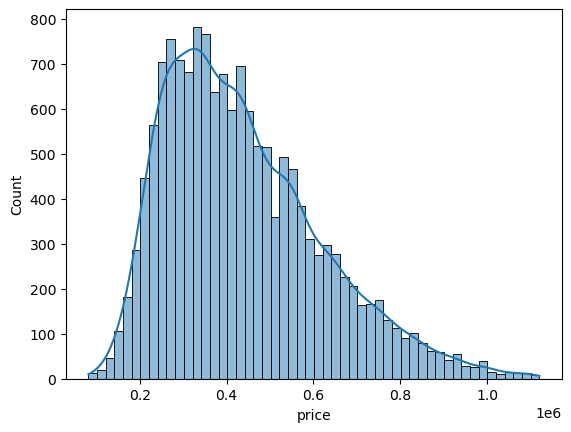

In [29]:
# Plotting the price distribution
sns.histplot(clean_df['price'], kde=True)
plt.show()

Now that we have the outliers removed from the dataset let's see how the living space relates to the house price.

# Analysis 1

**Analyse how does the square footage of the living area relate to price**

To understand the relationship between the square footage of the living area and the price, we can create a scatter plot. This will give us a visual representation of the data.


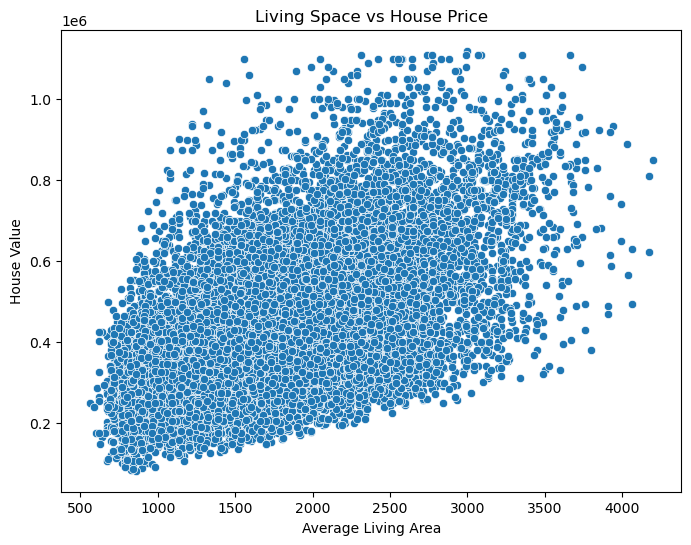

In [30]:
# Plotting living space against house price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=clean_df)
plt.title('Living Space vs House Price')
plt.xlabel('Average Living Area')
plt.ylabel('House Value')
plt.show()

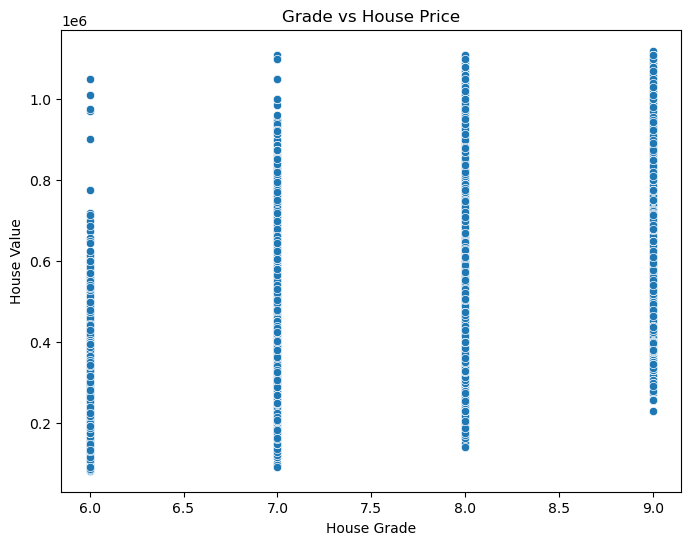

In [31]:
# Plotting influential features with the house price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='grade', y='price', data=clean_df)
plt.title('Grade vs House Price')
plt.xlabel('House Grade')
plt.ylabel('House Value')
plt.show()

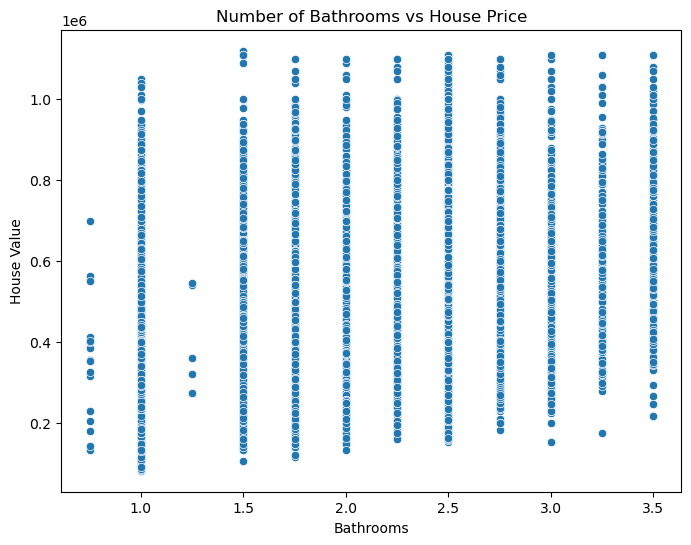

In [32]:
# Plotting influential features with the house price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bathrooms', y='price', data=clean_df)
plt.title('Number of Bathrooms vs House Price')
plt.xlabel('Bathrooms')
plt.ylabel('House Value')
plt.show()

**Observation:**

 The scatter plot shows that sqft_living, grade and bathrooms features are strongly positively correlated with the house price, indicating that houses with larger living areas, above average grade and with multiple bathrooms generally command higher prices.

**Implication:**

 This insight suggests that square footage followed by grade and bathrooms are significant factors in determining property prices in King County, which aligns with common expectations in real estate markets.

## Recommendation 1:
Based on the analysis and demonstrations houses with large living spaces, higher grading, and numerous bathrooms cost more than others. Therefore it is advisable to look for houses with such features to invest in and make profit on resale or to consider the features in order to find more affordable houses to buy.

***

### Objective 2: Provide a valuable EDA (Exploratory Data Analysis) for stakeholders such as homebuyers, sellers, real estate professionals, and policymakers to make data-driven decisions regarding property transactions and urban planning.

# Analysis 2

**Analyse The Impact of bathrooms to price**




/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:111

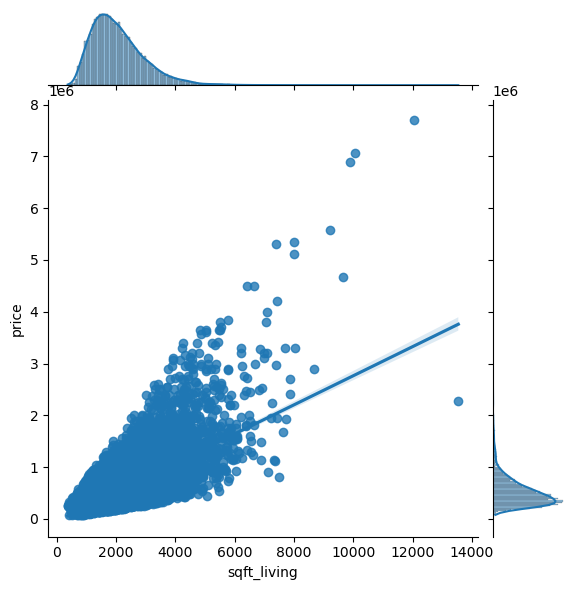

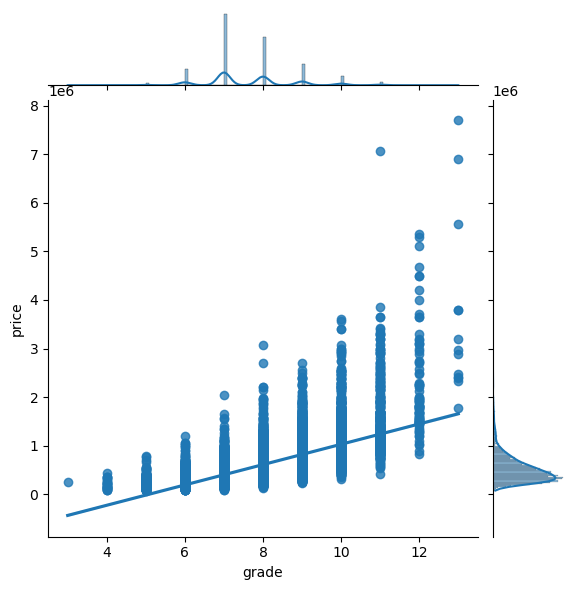

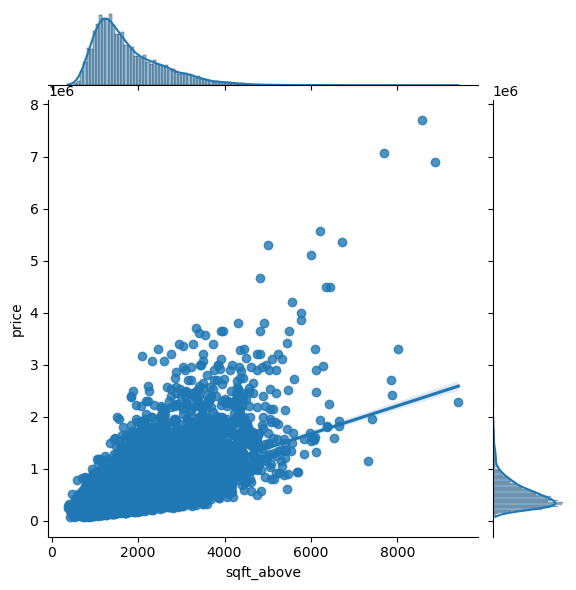

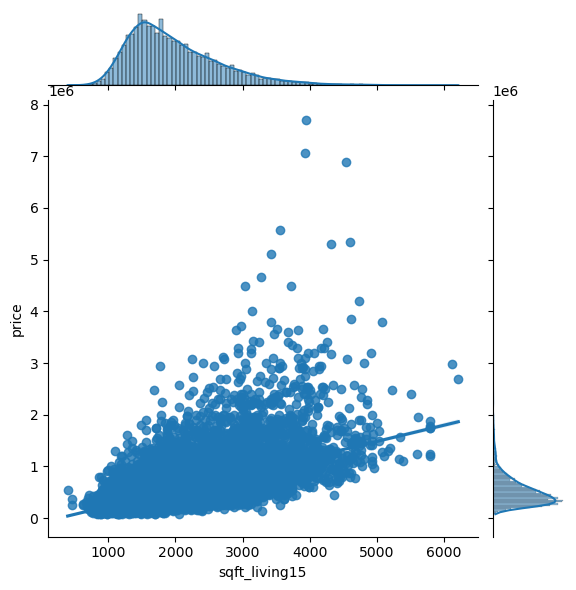

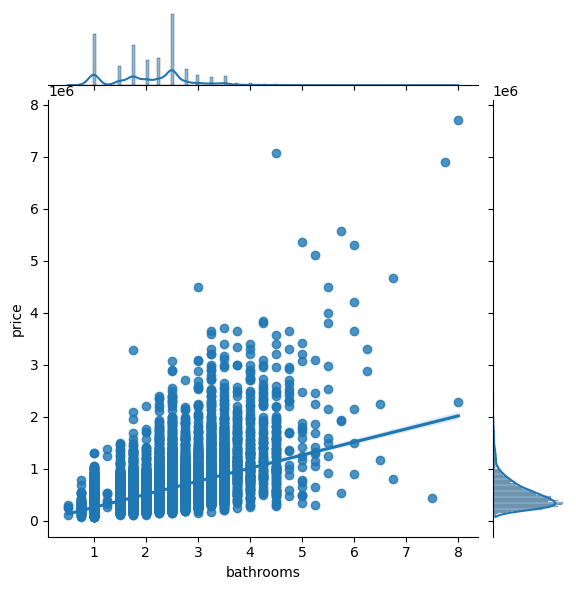

In [33]:
# Exploratory Data Analysis
for feature in highly_influencers:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')

## Recommendation 2:
This EDA shows that the housing market in King County is highly influenced by the living space, the grade a house receives, the square footage of interior housing living space for the nearest 15 neighbors and the number of bathrooms of a house. Stakeholders such as homebuyers, sellers, real estate professionals, and policymakers can get insights and make data-driven decisions regarding property transactions and urban planning based on this EDA.

***

# Objective 3 Develop a Multiple Regression Model for Predicting House Prices:

a. Objective: Build a predictive model that accurately estimates housing prices based on various  

b. Feature Selection: Use techniques such as Recursive Feature Elimination (RFE),  to select relevant features.

c. Model Selection: Test various models including:

d. Linear Models: Linear Regression

e. Finally we will do Model Evaluation: Use metrics like R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) to evaluate model performance. Perform cross-validation to ensure robustness.


# Model 1

In [34]:
# Creating a dataframe with selected features

df1 = df[['bedrooms','bathrooms','price','waterfront','condition']]
df1.head()

,bedrooms,bathrooms,price,waterfront,condition
0,3,1.00,221900.0,0,3
1,3,2.25,538000.0,0,3
2,2,1.00,180000.0,0,3
3,4,3.00,604000.0,0,5
4,3,2.00,510000.0,0,3


In [35]:
# Transform the dataframe
df_transformed_1 = df1.copy()
df_transformed_1['price_log'] = np.log(df_transformed_1['price'])
print(df_transformed_1.head())

   bedrooms  bathrooms     price  waterfront  condition  price_log
0         3       1.00  221900.0           0          3  12.309982
1         3       2.25  538000.0           0          3  13.195614
2         2       1.00  180000.0           0          3  12.100712
3         4       3.00  604000.0           0          5  13.311329
4         3       2.00  510000.0           0          3  13.142166


In [36]:
# Separate features and target variable
X = df_transformed_1[['bedrooms','bathrooms','waterfront','condition']]
y = df_transformed_1['price_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


R-squared: 0.32444782772387404
Mean Absolute Error: 0.3463239556238238
Coefficients: [0.04354581 0.3559081  0.87554247 0.08357308]
Intercept: 11.858860373149204


# Interpretation of Results

**R-squared**

**R-squared:** 0.3244: This indicates that approximately 32.44% of the variance in the logarithmically transformed house prices (price_log) can be explained by the model. This is a moderate level of explanatory power and suggests that while the selected features (sqft_living, grade, lat, long) are relevant, there are other important factors influencing house prices not captured by this model.

**Mean Absolute Error (MAE)**

**MAE: 0.3452:** This represents the average magnitude of errors in predicting the logarithmically transformed prices. In this case, the MAE is 0.3452 units on the log scale, which is a typical prediction error magnitude for this transformed variable.

***

# Model 2

In [37]:
# Select relevant features
df2 = df[['price','sqft_living', 'grade', 'bathrooms']]

# Transform variables
df_transformed_2 = df2.copy()
df_transformed_2['price_log'] = np.log(df_transformed_2['price'])
df_transformed_2.head()

,price,sqft_living,grade,bathrooms,price_log
0,221900.0,1180,7,1.00,12.309982
1,538000.0,2570,7,2.25,13.195614
2,180000.0,770,6,1.00,12.100712
3,604000.0,1960,7,3.00,13.311329
4,510000.0,1680,8,2.00,13.142166


In [38]:
# Separate features and target variable
X = df_transformed_2[['sqft_living', 'grade','bathrooms']]
y = df_transformed_2['price_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

R-squared: 0.551175224211654
Mean Absolute Error: 0.2832943470967524
Coefficients: [ 0.00022653  0.18971437 -0.01728759]
Intercept: 11.161694871756431


# Interpretation of Results

**R-squared**

**R-squared:** 0.5511: This indicates that approximately 55.11% of the variance in the logarithmically transformed house prices (price_log) can be explained by the model. This is a moderate level of explanatory power and suggests that while the selected features (sqft_living, grade, bathrooms) are relevant, there could be other important factors influencing house prices not captured by this model.

**Mean Absolute Error (MAE)**

**MAE: 0.2832:** This represents the average magnitude of errors in predicting the logarithmically transformed prices. In this case, the MAE is 0.2832 units on the log scale, which is a typical prediction error magnitude for this transformed variable.

***

#  Model 3


In [39]:
# Selecting different features from the data set
df3 = df[['price','sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms']]

# Transforming the variables
df_transformed_3 = df3.copy()
df_transformed_3['sqft_living_log'] = np.log1p(df_transformed_3['sqft_living'])
df_transformed_3['sqft_above'] = np.log1p(df_transformed_3['sqft_above'])
df_transformed_3['price_log'] = np.log(df_transformed_3['price'])
df_transformed_3.head()


,price,sqft_living,grade,sqft_above,bathrooms,bedrooms,sqft_living_log,price_log
0,221900.0,1180,7,7.074117,1.00,3,7.074117,12.309982
1,538000.0,2570,7,7.682943,2.25,3,7.852050,13.195614
2,180000.0,770,6,6.647688,1.00,2,6.647688,12.100712
3,604000.0,1960,7,6.957497,3.00,4,7.581210,13.311329
4,510000.0,1680,8,7.427144,2.00,3,7.427144,13.142166


In [40]:
# # Separate features and target variable
X = df_transformed_3[['sqft_living_log','grade','bedrooms','sqft_above']]
y = df_transformed_3['price_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

R-squared: 0.5485409388751608
Mean Absolute Error: 0.28027724416713923
Coefficients: [ 0.64419625  0.21700975 -0.03175622 -0.23418247]
Intercept: 8.362038811626237


# Interpretation of Results
**R-squared**

**R-squared: 0.5485:** This indicates that approximately 54.85% of the variance in the logarithmically transformed house prices (price_log) can be explained by the model. This is a moderate level of explanatory power, suggesting that the selected features explain a significant portion of the variation in house prices.

**Mean Absolute Error (MAE)**

**MAE: 0.2802:** This represents the average magnitude of the errors in predicting the logarithmically transformed prices. An MAE of 0.2802 units on the log scale indicates a reasonably good prediction accuracy, better than the previous model with fewer features.

**Coefficients**

**sqft_living (0.6514):** For each additional unit increase in square footage of living space, the logarithm of the price is expected to increase by approximately 0.6514 units, holding other factors constant. This shows a substantial positive impact of living space on house prices.

***

# Model 4

In [41]:
# Selecting features for model 5
df4 = df[['sqft_living', 'grade', 'price', 'lat', 'long']]
df_transformed_4 = df4.copy()

#Transform features
df_transformed_4['price_log'] = np.log(df_transformed_4['price'])
df_transformed_4.head()

,sqft_living,grade,price,lat,long,price_log
0,1180,7,221900.0,47.5112,-122.257,12.309982
1,2570,7,538000.0,47.7210,-122.319,13.195614
2,770,6,180000.0,47.7379,-122.233,12.100712
3,1960,7,604000.0,47.5208,-122.393,13.311329
4,1680,8,510000.0,47.6168,-122.045,13.142166


In [42]:
# Separate features and target variable
X = df_transformed_4[['sqft_living','grade' ,'lat','long']]
y = df_transformed_4['price_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

R-squared: 0.7063608450810133
Mean Absolute Error: 0.21953428946767334
Coefficients: [ 2.43805906e-04  1.59188965e-01  1.43172655e+00 -2.70519235e-01]
Intercept: -89.83181608893119



# Interpretation of Results

**R-squared**

**R-squared:** 0.7063: This indicates that approximately 70.63% of the variance in the logarithmically transformed house prices (price_log) can be explained by the model. 

**Mean Absolute Error (MAE)**

**MAE: 0.2195:** This represents the average magnitude of the errors in predicting the logarithmically transformed prices. In this case, the MAE is 0.2195 units on the log scale.
A lower MAE indicates better prediction accuracy. This idicaates that our model which have an MAE of 0.2195 is more accurate in predicting the log-transformed house prices than our Previous model with an MAE of 0.2789.


**Coefficients**

**sqft_living (0.0002439):** For each additional unit increase in square footage of living space, the logarithm of the price is expected to increase by approximately 0.0002439 units, holding other factors constant.

**grade (0.1591):** Each one-unit increase in the grade of the house is associated with an increase in the logarithm of the price by about 0.1591 units, holding other factors constant.

**lat (1.4346):** Each one-degree increase in latitude is associated with an increase in the logarithm of the price by approximately 1.4346 units, holding other factors constant. This indicates that latitude has a significant impact on house prices in the logarithmic scale.

**long (-0.2694):** Each one-degree increase in longitude is associated with a decrease in the logarithm of the price by approximately 0.2694 units, holding other factors constant.

**Intercept**

**Intercept (-89.8274):** The intercept represents the expected value of the logarithm of the house price when all predictors are zero. Since we're dealing with logarithmic transformation, this **interpretation is in terms of logarithmic units.

***

# Summary of Overall Models Performance:

**Model 1:** shows a relatively low R-squared value (0.3244), indicating that it explains only 32.44% of the variance in the data. Its MAE is 0.3452, suggesting a moderate level of prediction error.

**Model 2:** shows an improved R-squared value 0f 0.5511 explaining 55.11% of the variance and a 0.28 MAE value. However this is not satisfactory level of prediction given the significance of the model.

**Model 3:** has a lower R-squared value (0.5485), explaining 54.85% of the variance. Its MAE is 0.278, indicating a weaker predictive performance than Model 2.

**Model 4:** has the highest R-squared value (0.7063), explaining 70.63% of the variance. It also has the lowest MAE (0.21), suggesting it provides the most accurate predictions.

***

## Recommendation 3:

The best model for predicting housing prices in King County, based on the provided dataset and transformation techniques, is Model 4. This model has a high R-squared value of 0.7063, indicating it explains 70.63% of the variance in the logarithmically transformed house prices. It also has a low MAE of 0.2194, indicating it has the lowest prediction error. This model effectively captures the mean and standard deviation of the logarithmically transformed house prices.

With the highest R-squared value of 0.7063, and lowest MAE of 0.2194, this Model is the most accurate and reliable model for predicting housing prices.
***



# Moderate Fit:

An R-squared value of 0.7 indicates a moderate level of explanatory power. This suggests that our model is capturing some, but not all, of the important factors influencing house prices. In real estate data, it is common for multiple factors to influence the house prices.

Error Magnitude:
The MAE of 0.2 provides a clear understanding of the average prediction error. Given that MAE is in the same units as our target variable (log-transformed house prices), we can interpret this as the average deviation of our predictions from the actual values.

In [43]:
# Define the predictors and target variable
X = df_transformed_4[['sqft_living','grade' ,'lat','long']]
y = df_transformed_4['price_log']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 1.309e+04
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:35:46   Log-Likelihood:                -3496.0
No. Observations:               21596   AIC:                             7002.
Df Residuals:                   21591   BIC:                             7042.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -89.2467      1.781    -50.123      

 **Visualize Predicted vs. Actual Prices**

The predicted vs. actual prices plot helps us see how well the model's predictions match the actual values. Ideally, points should lie along the 45-degree line, indicating perfect predictions.

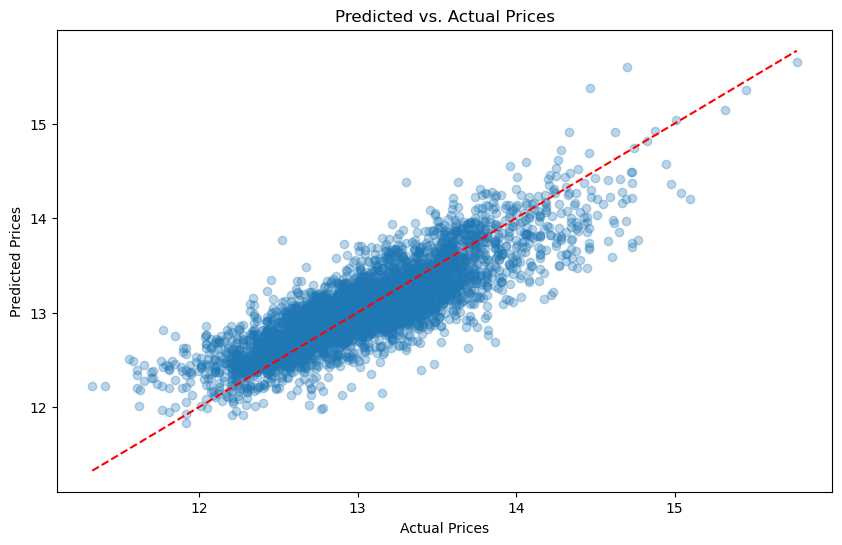

In [44]:
# Assuming y_test and y_pred are your actual and predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.show()

**Perform Residual Analysis**

Residual analysis involves examining the residuals (differences between actual and predicted values). Residual plots and histograms can help identify systematic errors or biases.

**Residuals vs. Predicted Prices**
A residuals vs. predicted prices plot helps check for patterns. Ideally, residuals should be randomly distributed around zero.

**Histogram of Residuals**

A histogram of residuals will  help us check if they are normally distributed around zero.

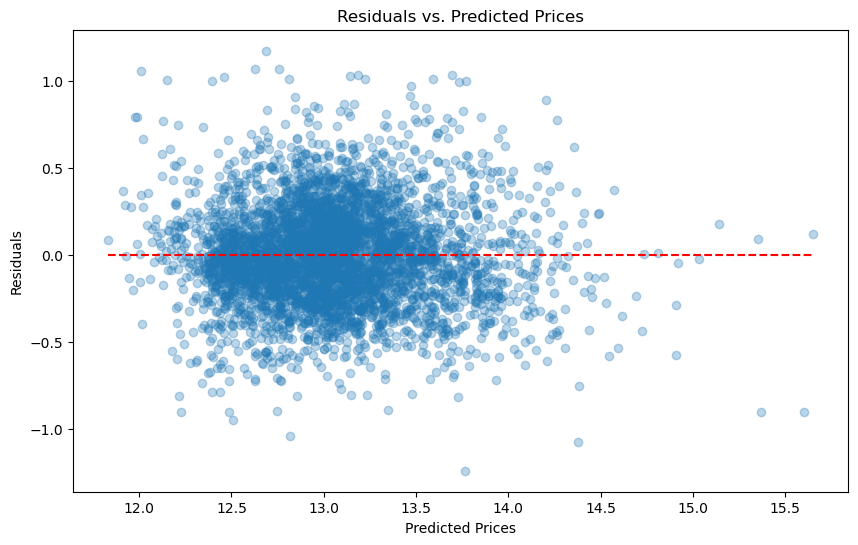

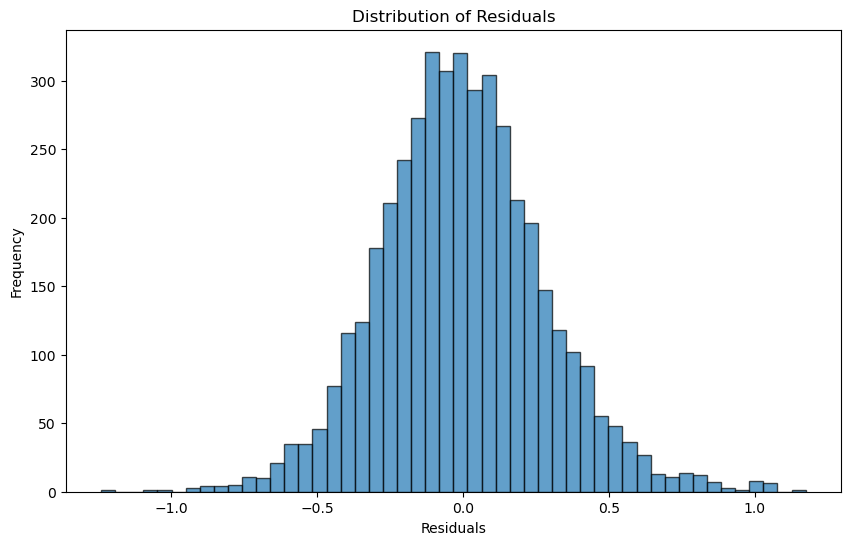

In [45]:
#Calculate residuals
residuals = y_test - y_pred

# Plot Residuals vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Prices")
plt.show()

# Plot Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

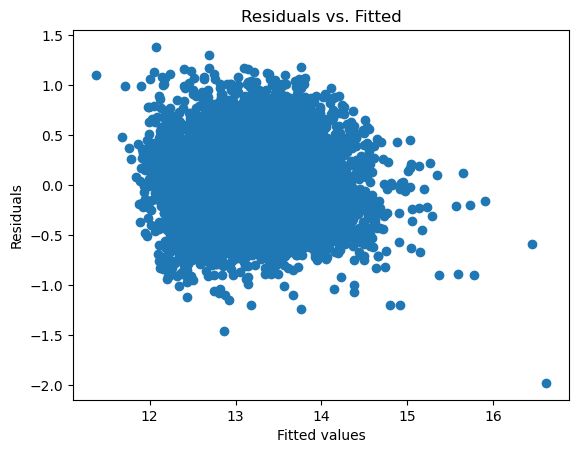

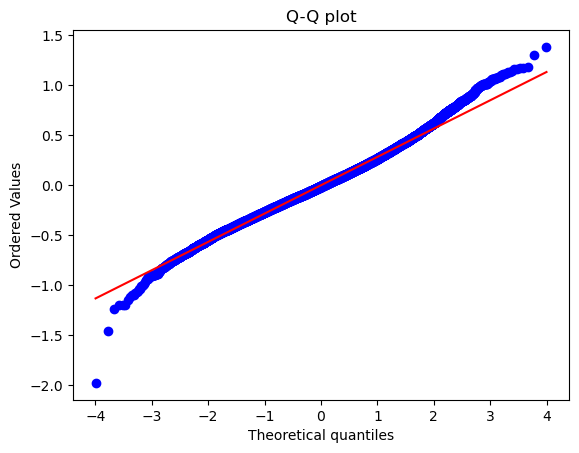

In [46]:
# Investigate if the residuals are normally distributed
import scipy.stats as stats
# Residuals vs. Fitted
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# Q-Q plot
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

***

## Conclusion:

The project aimed to:

**1:** Identify key factors influencing housing prices in the region.

**2:** Provide a valuable Exploratory Data Analysis (EDA) for stakeholders such as homebuyers, sellers, real estate professionals, and policymakers to make informed decisions regarding property transactions and urban planning.

**3:** Develop a machine learning model to accurately predict housing prices based on property features, location, and market conditions.

Using the King County housing dataset, we examined the data, cleaned it of missing and NaN values, performed an analysis, and developed a model that predicts housing prices with 70% accuracy based on various factors.



## Recommendations
**Investment Strategy:** Houses with larger living spaces, higher grades, and more bathrooms tend to be more expensive. Investors should focus on these features to maximize resale profits or find affordable options by considering these factors.

**Market Insights:** The EDA reveals that the King County housing market is significantly influenced by living space, house grade, interior square footage of neighboring homes, and the number of bathrooms. Stakeholders can use these insights for data-driven decisions in property transactions and urban planning.

**Model Selection:** The best model for predicting housing prices in King County is Model 4, which has an R-squared value of 0.7063 and a low Mean Absolute Error (MAE) of 0.2194. This model explains 70.63% of the variance in logarithmically transformed house prices and has the lowest prediction error, effectively capturing the mean and standard deviation of the transformed prices.


***
